# Part 1B: Feature Engineering

In [2]:
import pandas as pd

crash_data = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
vehicle_data = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')

crash_data = crash_data.sort_values(by=['RD_NO'])
vehicle_data = vehicle_data.sort_values(by=['RD_NO'])

df = pd.merge(crash_data,vehicle_data, on = 'RD_NO')

df.isna().sum()

D:\Users\Jonathan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (18,39,40,41,43,47,48,49,54,57,58,60,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RD_NO                            0
CRASH_DATE_EST_I            418364
CRASH_DATE_x                     0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
LANE_CNT                    127652
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                   9055
CRASH_TYPE                       0
INTERSECTION_RELATED_I      356200
NOT_RIGHT_OF_WAY_I          433979
HIT_AND_RUN_I               326016
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 4
STREET_NAME                      2
BEAT_OF_OCCURRENCE               8
PHOTOS_TAKEN_I              445710
STATEMENTS_TAKEN_I  

In [5]:
crash_data.isna().sum()/len(crash_data) * 100

RD_NO                             0.000000
CRASH_DATE_EST_I                 92.566797
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
LANE_CNT                         28.458830
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       1.901580
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           79.121543
NOT_RIGHT_OF_WAY_I               95.540168
HIT_AND_RUN_I                    72.567781
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO  

### 1. Chicago Traffic Crash Dataset Preparation

In [69]:
crash_data = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
vehicle_data = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')

crash_data = crash_data.sort_values(by=['RD_NO'])
vehicle_data = vehicle_data.sort_values(by=['RD_NO'])

df = pd.merge(crash_data,vehicle_data, on = 'RD_NO')
df = df[df.UNIT_TYPE == 'DRIVER']
df = df[df.TRAFFICWAY_TYPE != 'UKNOWN']
df = df[df.WEATHER_CONDITION != 'UKNOWN']
df = df[df.VEHICLE_TYPE == 'PASSENGER']
df = df[df.LIGHTING_CONDITION != 'UNKNOWN']

D:\Users\Jonathan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (18,39,40,41,43,47,48,49,54,57,58,60,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
df_new = df.loc[:,['WEATHER_CONDITION','INJURIES_TOTAL','DAMAGE','CRASH_DAY_OF_WEEK','CRASH_MONTH',\
 'CRASH_HOUR','LIGHTING_CONDITION','MANEUVER','TRAFFICWAY_TYPE','PRIM_CONTRIBUTORY_CAUSE',\
 'POSTED_SPEED_LIMIT','DEVICE_CONDITION','TRAFFIC_CONTROL_DEVICE','ALIGNMENT',\
 'ROADWAY_SURFACE_COND']]
df_new = df_new.dropna(axis=0)
# Checking whether there are Null values in the columns
NullsPerColumn = pd.DataFrame((df_new.isnull().sum())/len(df_new.index))
NullsPerColumn.columns=['Percentage Null']
NullsPerColumn

,Percentage Null
WEATHER_CONDITION,0.0
INJURIES_TOTAL,0.0
DAMAGE,0.0
CRASH_DAY_OF_WEEK,0.0
CRASH_MONTH,0.0
CRASH_HOUR,0.0
LIGHTING_CONDITION,0.0
MANEUVER,0.0
TRAFFICWAY_TYPE,0.0
PRIM_CONTRIBUTORY_CAUSE,0.0


### 2. Engineering Relevant Features for Accident Danger Score Prediction

In [90]:
df.NUM_PASSENGERS = df.NUM_PASSENGERS.apply(lambda x: 1 if np.isnan(x) else x+1)
df['NUM_DRIVERS'] = df.NUM_UNITS.apply(lambda x: x if x==1 else x+1) 
df.NUM_PASSENGERS = df.NUM_PASSENGERS + df.NUM_DRIVERS
df.NUM_PASSENGERS.unique()

array([ 8.,  9., 10.,  4., 11., 13., 12.,  5., 14.,  6.,  7., 16., 17.,
       15., 21., 18., 20., 23., 26., 24., 22., 19., 40.])

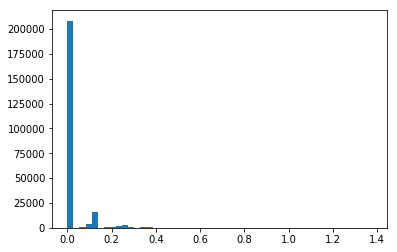

[0.         0.11111111 0.125      0.33333333 0.22222222 0.25
 0.375      0.3        0.1        0.2        0.09090909 0.08333333
 0.36363636 0.5        0.21428571 0.18181818 0.07692308 0.14285714
 0.15384615 0.16666667 0.4        0.27272727 0.42857143 0.66666667
 0.28571429 0.45454545 0.0625     0.75       0.41666667 0.625
 0.07142857 0.23076923 0.44444444 0.38461538 0.35714286 0.55555556
 0.30769231 0.46153846 0.54545455 0.6        0.53333333 0.7
 0.63636364 0.61538462 0.57142857 0.4375     0.13333333 0.875
 0.46666667 1.375      0.06666667 0.53846154 0.11764706 0.1875
 0.26923077 0.29166667 0.8        1.         0.26666667 0.9
 0.88888889 0.23529412 0.05       0.04545455 0.05882353 0.05555556
 0.05263158 0.71428571 0.58823529 0.58333333 0.41176471 0.5625
 0.0952381  0.77777778 0.76923077 0.90909091 0.69230769 0.17647059]


In [91]:
df_new['INJURIES_PER_PASSENGER'] = df_new['INJURIES_TOTAL']/ df['NUM_PASSENGERS']
import matplotlib.pyplot as plt
plt.hist(df_new['INJURIES_PER_PASSENGER'], bins = 50)
plt.show()

print(df_new['INJURIES_PER_PASSENGER'].unique())

In [92]:
df_new['DANGER_SCORE'] = df_new.INJURIES_PER_PASSENGER.apply(lambda x: 4 if x>2 else x)
df_new.DANGER_SCORE = df_new.DANGER_SCORE.apply(lambda x: 3 if (x>1 and x<=2) else x)
df_new.DANGER_SCORE = df_new.DANGER_SCORE.apply(lambda x: 2 if (x>0 and x<=1) else x)
df_new.DANGER_SCORE = df_new.DANGER_SCORE.apply(lambda x: 1 if x==0 else x)
df_new.groupby('DANGER_SCORE').count()

,WEATHER_CONDITION,INJURIES_TOTAL,DAMAGE,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_HOUR,LIGHTING_CONDITION,MANEUVER,TRAFFICWAY_TYPE,PRIM_CONTRIBUTORY_CAUSE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE,ALIGNMENT,ROADWAY_SURFACE_COND,INJURIES_PER_PASSENGER
DANGER_SCORE,,,,,,,,,,,,,,,,
1.0,208475,208475,208475,208475,208475,208475,208475,208475,208475,208475,208475,208475,208475,208475,208475,208475
2.0,28786,28786,28786,28786,28786,28786,28786,28786,28786,28786,28786,28786,28786,28786,28786,28786
3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [93]:
df_new.DAMAGE = df_new.DAMAGE.apply(lambda x: 1 if x == '$500 OR LESS' else (2 if x == '$501 - $1,500' else 3))
w = 0.5 # assign a weight of 0.5 (can be changed)
df_new['COMBINED_DANGER_SCORE'] = df_new.DANGER_SCORE*(w*df_new.DAMAGE)
df_new.COMBINED_DANGER_SCORE.value_counts()

1.5    113291
1.0     74001
0.5     24490
3.0     21320
2.0      4160
Name: COMBINED_DANGER_SCORE, dtype: int64

In [94]:
df_new.head()

,WEATHER_CONDITION,INJURIES_TOTAL,DAMAGE,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_HOUR,LIGHTING_CONDITION,MANEUVER,TRAFFICWAY_TYPE,PRIM_CONTRIBUTORY_CAUSE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE,ALIGNMENT,ROADWAY_SURFACE_COND,INJURIES_PER_PASSENGER,DANGER_SCORE,COMBINED_DANGER_SCORE
0,CLEAR,0.0,2,2,1,9,DAYLIGHT,CHANGING LANES,PARKING LOT,IMPROPER LANE USAGE,30,NO CONTROLS,NO CONTROLS,STRAIGHT AND LEVEL,DRY,0.0,1.0,1.0
1,CLEAR,0.0,2,2,1,9,DAYLIGHT,STRAIGHT AHEAD,PARKING LOT,IMPROPER LANE USAGE,30,NO CONTROLS,NO CONTROLS,STRAIGHT AND LEVEL,DRY,0.0,1.0,1.0
2,CLEAR,0.0,2,4,1,8,DAYLIGHT,PASSING/OVERTAKING,NOT DIVIDED,UNABLE TO DETERMINE,35,NO CONTROLS,NO CONTROLS,STRAIGHT AND LEVEL,DRY,0.0,1.0,1.0
3,CLEAR,0.0,2,4,1,8,DAYLIGHT,OTHER,NOT DIVIDED,UNABLE TO DETERMINE,35,NO CONTROLS,NO CONTROLS,STRAIGHT AND LEVEL,DRY,0.0,1.0,1.0
7,CLEAR,0.0,3,6,1,19,"DARKNESS, LIGHTED ROAD",STRAIGHT AHEAD,NOT DIVIDED,FAILING TO YIELD RIGHT-OF-WAY,15,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,STRAIGHT AND LEVEL,DRY,0.0,1.0,1.5


### 3. Create Dummy Binary Columns for Categorical Features 

In [96]:
X = df_new.copy()
weather_dummies = pd.get_dummies(X.WEATHER_CONDITION)
newcols = weather_dummies.columns
X[newcols] = weather_dummies
X.drop('WEATHER_CONDITION',axis = 1, inplace = True)

lighting_dummies = pd.get_dummies(X.LIGHTING_CONDITION)
newcols = lighting_dummies.columns
X[newcols] = lighting_dummies
X.drop('LIGHTING_CONDITION',axis = 1, inplace = True)

maneuver_dummies = pd.get_dummies(X.MANEUVER)
newcols = maneuver_dummies.columns
X[newcols] = maneuver_dummies
X.drop('MANEUVER',axis = 1, inplace = True)

trafficway_dummies = pd.get_dummies(X.TRAFFICWAY_TYPE)
newcols = trafficway_dummies.columns
X[newcols] = trafficway_dummies
X.drop('TRAFFICWAY_TYPE',axis = 1, inplace = True)

cause_dummies = pd.get_dummies(X.PRIM_CONTRIBUTORY_CAUSE)
newcols = cause_dummies.columns
X[newcols] = cause_dummies
X.drop('PRIM_CONTRIBUTORY_CAUSE',axis = 1, inplace = True)

cause_dummies = pd.get_dummies(X.DEVICE_CONDITION)
newcols = cause_dummies.columns
X[newcols] = cause_dummies
X.drop('DEVICE_CONDITION',axis = 1, inplace = True)

cause_dummies = pd.get_dummies(X.TRAFFIC_CONTROL_DEVICE)
newcols = cause_dummies.columns
X[newcols] = cause_dummies
X.drop('TRAFFIC_CONTROL_DEVICE',axis = 1, inplace = True)

cause_dummies = pd.get_dummies(X.ALIGNMENT)
newcols = cause_dummies.columns
X[newcols] = cause_dummies
X.drop('ALIGNMENT',axis = 1, inplace = True)

cause_dummies = pd.get_dummies(X.ROADWAY_SURFACE_COND)
newcols = cause_dummies.columns
X[newcols] = cause_dummies
X.drop('ROADWAY_SURFACE_COND',axis = 1, inplace = True)

### 4. Determining Correlation of Features (for Feature Selection)

,COMBINED_DANGER_SCORE
COMBINED_DANGER_SCORE,1.000000
DANGER_SCORE,0.753871
DAMAGE,0.699311
INJURIES_PER_PASSENGER,0.681788
INJURIES_TOTAL,0.667381
DISREGARDING TRAFFIC SIGNALS,0.117167
UNABLE TO DETERMINE,0.099266
BACKING,0.084765
PARKING LOT,0.082369
FUNCTIONING PROPERLY,0.077241


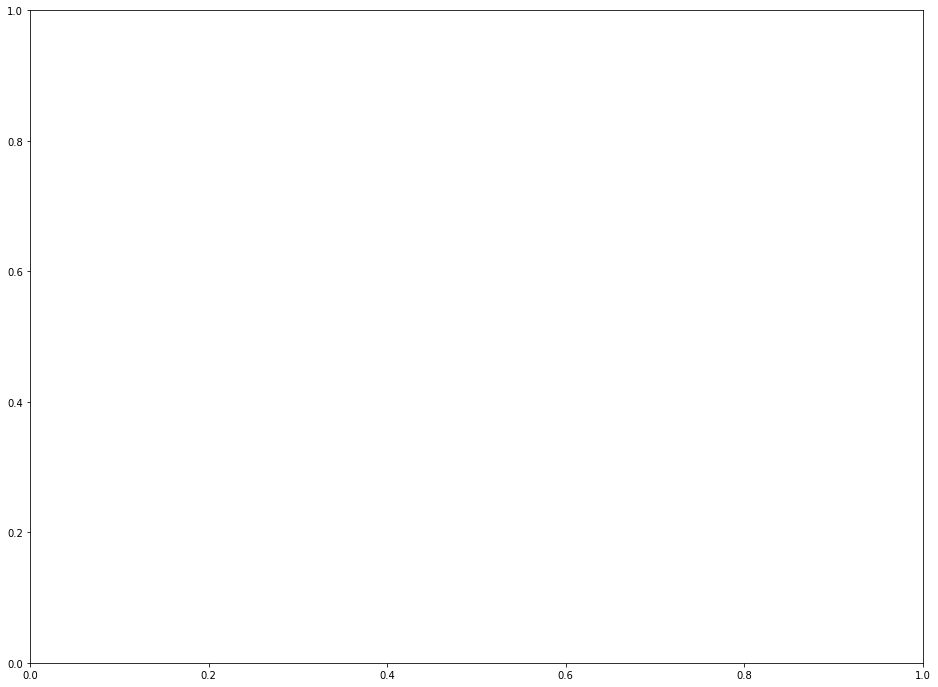

In [101]:
plt.figure(figsize = (16,12))
ax = plt.axes()
new_df_corr = X.corr()
corr_df = pd.DataFrame(np.abs(new_df_corr['COMBINED_DANGER_SCORE'])).sort_values(by = ['COMBINED_DANGER_SCORE'], ascending = False)
corr_df

In [117]:
corr_df[corr_df['COMBINED_DANGER_SCORE'] > 0.03]

,COMBINED_DANGER_SCORE
COMBINED_DANGER_SCORE,1.000000
DANGER_SCORE,0.753871
DAMAGE,0.699311
INJURIES_PER_PASSENGER,0.681788
INJURIES_TOTAL,0.667381
DISREGARDING TRAFFIC SIGNALS,0.117167
UNABLE TO DETERMINE,0.099266
BACKING,0.084765
PARKING LOT,0.082369
FUNCTIONING PROPERLY,0.077241


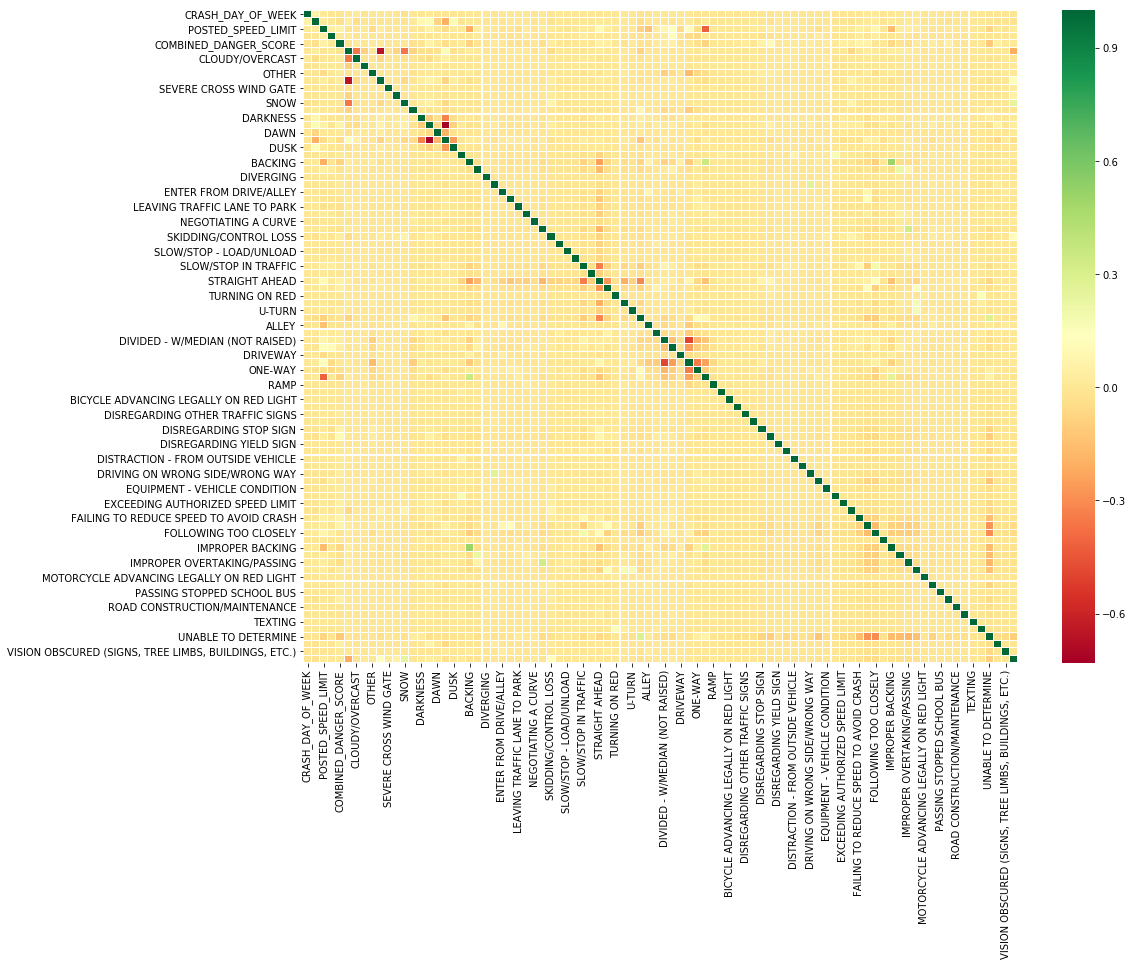

In [21]:
from matplotlib import cm as cm
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (16,12))
ax = plt.axes()
corr_matrix = X.corr()
sns.heatmap(corr_matrix, ax = ax, cmap = "RdYlGn", linewidths = 0.05)
plt.show()

In [ ]:
# choosing features based on magnitude of correlation coefficient

impt_features = ['LIGHTING_CONDITION','MANEUVER','TRAFFICWAY_TYPE','PRIM_CONTRIBUTORY_CAUSE','POSTED_SPEED_LIMIT','DEVICE_CONDITION',\
'TRAFFIC_CONTROL_DEVICE','ALIGNMENT','ROADWAY_SURFACE_COND']

### 5. Determining Linear Regression Coefficients of Features (for Feature Selection)

In [44]:
import statsmodels.api as sm
y = X['COMBINED_DANGER_SCORE']
X_reg = X.drop(['COMBINED_DANGER_SCORE'], axis = 1, inplace = True)
results = sm.OLS(y, X).fit()

D:\Users\Jonathan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     COMBINED_DANGER_SCORE   R-squared:                       0.061
Model:                               OLS   Adj. R-squared:                  0.061
Method:                    Least Squares   F-statistic:                     279.5
Date:                   Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                           18:54:47   Log-Likelihood:            -3.3498e+05
No. Observations:                 366111   AIC:                         6.701e+05
Df Residuals:                     366025   BIC:                         6.711e+05
Df Model:                             85                                         
Covariance Type:               nonrobust                                         
====================================================================================================================================================
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
CRASH_DAY_OF_WEEK                                                                -8.318e-05      0.001     -0.162      0.872      -0.001       0.001
CRASH_HOUR                                                                          -0.0033      0.000    -16.899      0.000      -0.004      -0.003
POSTED_SPEED_LIMIT                                                                   0.0005      0.000      2.855      0.004       0.000       0.001
Total Passing Vehicle Volume                                                      2.268e-07   8.35e-08      2.716      0.007    6.31e-08    3.91e-07
CLEAR                                                                                0.0210      0.007      3.049      0.002       0.007       0.034
CLOUDY/OVERCAST                                                                      0.0668      0.009      7.403      0.000       0.049       0.085
FOG/SMOKE/HAZE                                                                       0.0070      0.024      0.286      0.775      -0.041       0.055
OTHER                                                                                1.4345      0.012    124.594      0.000       1.412       1.457
RAIN                                                                                 0.0420      0.008      5.569      0.000       0.027       0.057
SEVERE CROSS WIND GATE                                                              -0.0032      0.076     -0.042      0.967      -0.153       0.147
SLEET/HAIL                                                                           0.0832      0.029      2.873      0.004       0.026       0.140
SNOW                                                                                 0.0124      0.009      1.381      0.167      -0.005       0.030
UNKNOWN                                                                              1.2684      0.013     94.543      0.000       1.242       1.295
DARKNESS                                                                            -0.0526      0.009     -5.690      0.000      -0.071      -0.034
DARKNESS, LIGHTED ROAD                                                               0.0100      0.008      1.193      0.233      -0.006       0.026
DAWN                                                                                -0.0314      0.012     -2.730      0.006      -0.054      -0.009
DAYLIGHT                                                                            -0.0597      0.008     -7.250      0.000      -0.076      -0.044
DUSK                                                                  

In [57]:
reg_coef = pd.DataFrame(abs(results.params), columns = ['coef']).sort_values(by = 'coef', ascending = False)
reg_coef

,coef
DIVIDED - W/MEDIAN BARRIER,1.474073e+00
CENTER TURN LANE,1.472360e+00
OTHER,1.434501e+00
DIVIDED - W/MEDIAN (NOT RAISED),1.405246e+00
NOT DIVIDED,1.380037e+00
RAMP,1.363265e+00
ONE-WAY,1.339833e+00
ALLEY,1.322318e+00
DRIVEWAY,1.294771e+00
PARKING LOT,1.278618e+00
